In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90, 90, size = 1500)

longs = np.random.uniform(-180, 180, size = 1500)

lat_lngs = zip(lats, longs) # zip puts two arrays in pairs

lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [5]:
# each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Import requests library
import requests

from config import weather_api_key

In [9]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL. (Will show an error page since no endpoint is added to URL)

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try: 
        # Run an API request for each of the cities.
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | uvira
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | urusha
Processing Record 12 of Set 1 | mayahi
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | guiratinga
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ijaki
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | salamiyah
Processing Record 19 of Set 1 | sola
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | benito juarez
Processing Record 22 of Set 1 | mahebourg
Proc

In [12]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,41.16,93,100,0.72,GL,2022-07-26 21:15:13
1,Punta Arenas,-53.1500,-70.9167,37.11,69,0,9.22,CL,2022-07-26 21:12:18
2,Ribeira Grande,38.5167,-28.7000,75.27,80,41,6.98,PT,2022-07-26 21:16:36
3,Port Elizabeth,-33.9180,25.5701,59.31,77,0,9.22,ZA,2022-07-26 21:16:36
4,Uvira,-3.4067,29.1458,75.25,64,83,1.92,CD,2022-07-26 21:16:36
5,Cape Town,-33.9258,18.4232,56.12,83,72,1.01,ZA,2022-07-26 21:11:44
6,Longyearbyen,78.2186,15.6401,48.04,81,75,4.61,SJ,2022-07-26 21:16:37
7,New Norfolk,-42.7826,147.0587,43.92,85,77,2.80,AU,2022-07-26 21:16:37
8,Lebu,-37.6167,-73.6500,53.22,79,3,17.05,CL,2022-07-26 21:15:39
9,Upernavik,72.7868,-56.1549,38.55,89,88,11.34,GL,2022-07-26 21:16:38


In [13]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-07-26 21:15:13,65.6145,-37.6368,41.16,93,100,0.72
1,Punta Arenas,CL,2022-07-26 21:12:18,-53.1500,-70.9167,37.11,69,0,9.22
2,Ribeira Grande,PT,2022-07-26 21:16:36,38.5167,-28.7000,75.27,80,41,6.98
3,Port Elizabeth,ZA,2022-07-26 21:16:36,-33.9180,25.5701,59.31,77,0,9.22
4,Uvira,CD,2022-07-26 21:16:36,-3.4067,29.1458,75.25,64,83,1.92
...,...,...,...,...,...,...,...,...,...
569,Sedalia,US,2022-07-26 21:31:34,38.7045,-93.2283,79.43,83,0,8.05
570,Paita,PE,2022-07-26 21:31:34,-5.0892,-81.1144,65.77,81,98,18.23
571,Lompoc,US,2022-07-26 21:31:35,34.6391,-120.4579,90.01,67,0,14.97
572,Vila Franca Do Campo,PT,2022-07-26 21:31:35,37.7167,-25.4333,78.19,92,34,4.83


In [14]:
# Create output csv file

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.

import time

# Get today's date in seconds.

today = time.time()

today

1658871093.7239547

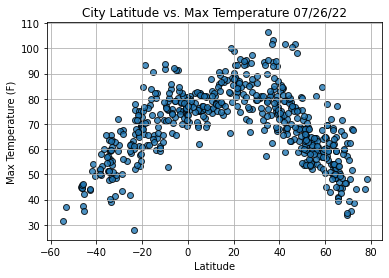

In [17]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, 
            max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

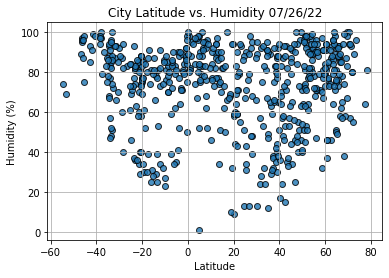

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

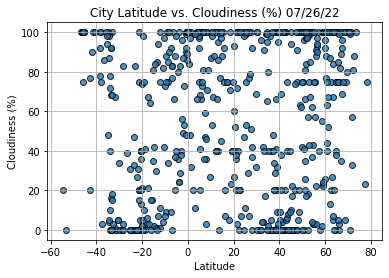

In [19]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

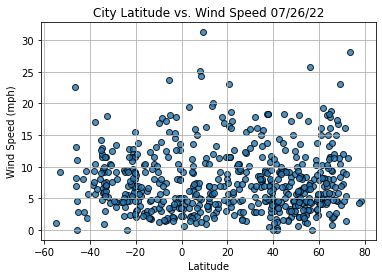

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [42]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [43]:
print(lats)

0      65.6145
1     -53.1500
2      38.5167
3     -33.9180
4      -3.4067
        ...   
569    38.7045
570    -5.0892
571    34.6391
572    37.7167
573    36.5583
Name: Lat, Length: 574, dtype: float64


In [44]:
index13 = city_data_df.loc[13]

In [45]:
index13

City                   Guiratinga
Country                        BR
Date          2022-07-26 21:16:39
Lat                      -16.3494
Lng                      -53.7583
Max Temp                    83.89
Humidity                       25
Cloudiness                      0
Wind Speed                   2.64
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
569     True
570    False
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-07-26 21:15:13,65.6145,-37.6368,41.16,93,100,0.72
2,Ribeira Grande,PT,2022-07-26 21:16:36,38.5167,-28.7000,75.27,80,41,6.98
6,Longyearbyen,SJ,2022-07-26 21:16:37,78.2186,15.6401,48.04,81,75,4.61
9,Upernavik,GL,2022-07-26 21:16:38,72.7868,-56.1549,38.55,89,88,11.34
10,Urusha,RU,2022-07-26 21:16:38,54.0500,122.9000,63.36,86,37,3.40


In [48]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

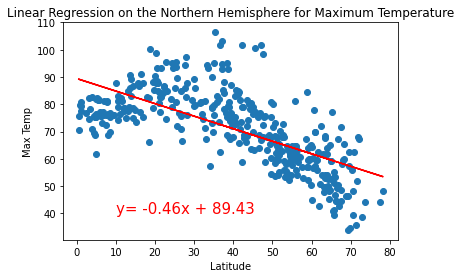

In [49]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10, 40))

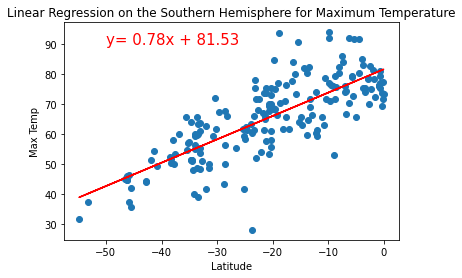

In [50]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

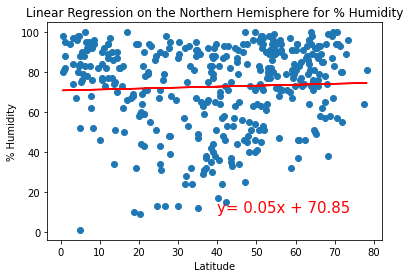

In [52]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity", "% Humidity", (40, 10))

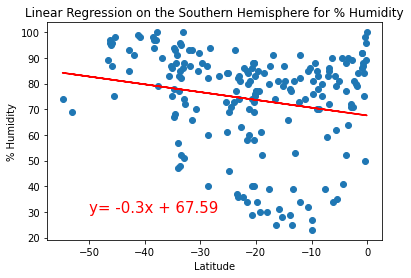

In [54]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,30))

In [56]:
linregress(x_values, y_values) # check r-value for correlation

LinregressResult(slope=-0.3030605561759613, intercept=67.5898141410718, rvalue=-0.20172407438104156, pvalue=0.004793562106964324, stderr=0.10619399690760667, intercept_stderr=2.6049211456990036)

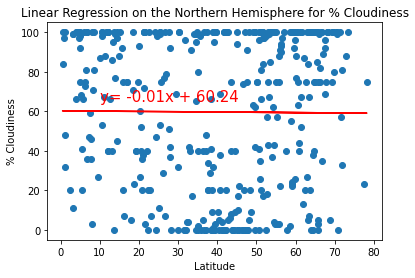

In [61]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness", (10, 65))

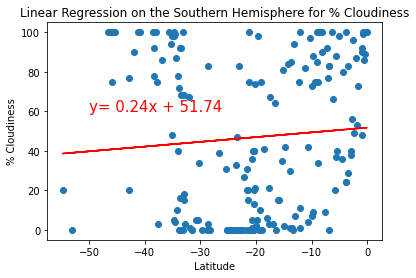

In [62]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [63]:
linregress(x_values, y_values)

LinregressResult(slope=0.23935749625617675, intercept=51.73717553030158, rvalue=0.07934321691614535, pvalue=0.2714558847917004, stderr=0.21702775414752992, intercept_stderr=5.323654843449725)

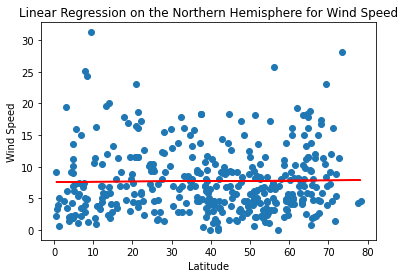

In [64]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

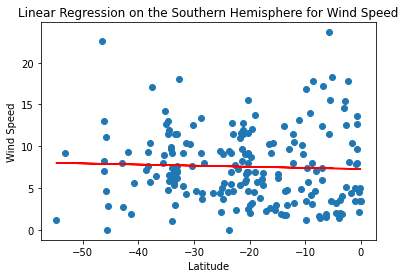

In [65]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))